<a href="https://colab.research.google.com/github/apriliadinir/Hotel_Business_Visualization/blob/main/Hotel_business_using_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving hotel_bookings_data.csv to hotel_bookings_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import dataset
df = pd.read_csv('hotel_bookings_data.csv')
print(df.shape)
df.head()

(119390, 29)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [4]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

children, agent, company data type shall be integer

# Data Preprocessing

**Data Preprocessing**

In [5]:
# check null value
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_weekdays_nights,0
adults,0


In [6]:
#understanding the data
df['children'].value_counts()

,count
children,
0.0,110796
1.0,4861
2.0,3652
3.0,76
10.0,1


In [7]:
#understanding the data
df['city'].value_counts()

,count
city,
Kota Denpasar,48590
Kabupaten Bangka,12129
Kota Yogyakarta,10415
Kota Batu,8568
Kabupaten Bandung,7287
...,...
Kabupaten Timor Tengah Selatan,1
Kota Bukittinggi,1
Kota Padang,1


In [8]:
#understanding the data
df['company'].value_counts()

,count
company,
40.0,927
223.0,784
67.0,267
45.0,250
153.0,215
...,...
18.0,1
273.0,1
368.0,1


In [9]:
## Handling null values
df['children'] = df['children'].fillna(0)
df['city'] = df['city'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)
# Check null values again
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_weekdays_nights,0
adults,0


In [10]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_weekdays_nights,0
adults,0


In [11]:
# Fix the data type
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [12]:
df['meal'].value_counts()

,count
meal,
Breakfast,92310
Dinner,14463
No Meal,10650
Undefined,1169
Full Board,798


In [13]:
df['market_segment'].value_counts()

,count
market_segment,
Online TA,56477
Offline TA/TO,24219
Groups,19811
Direct,12606
Corporate,5295
Complementary,743
Aviation,237
Undefined,2


In [14]:
df['distribution_channel'].value_counts()

,count
distribution_channel,
TA/TO,97870
Direct,14645
Corporate,6677
GDS,193
Undefined,5


In [15]:
#fix incorrect value
# replace 'Undified' in meal, market_segment, and distribution channel
df['meal'] = df['meal'].replace(['Undefined'], 'No meal')
df['meal'].value_counts()

,count
meal,
Breakfast,92310
Dinner,14463
No Meal,10650
No meal,1169
Full Board,798


In [16]:
df['guest'] = df['adults'] + df['children'] + df['babies']
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,guest
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,...,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363,1.968239
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,...,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798,0.722394
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,55.000000


In [17]:
#Removing records with zero guests
df_preprocessing = df[df['guest']>0].copy()
df_preprocessing.shape

(119210, 30)

In [18]:
# membandingkan data sebelum preprocessing

print('before data preprocessing: ',df.shape[0])
print('after data preprocessing: ', df_preprocessing.shape[0])

before data preprocessing:  119390
after data preprocessing:  119210


In [19]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

# Monthly Hotel Booking Analysis Based on Hotel Type

In [20]:
#membuat copy data hasil pre processing
df2 = df_preprocessing.copy()

In [21]:
#groupby menghitung jumlah pemesanan hotel tiap bulan
df2a = df2.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df2a.columns  = ['hotel', 'arrival_month','unique_year','total_booking']
df2a

,hotel,arrival_month,unique_year,total_booking
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


bulan oktober dan september memiliki data dari 3tahun yang lalu, sedangkan bulan lain hanya punya data 2tahun

In [22]:
#normalisasi data untuk menghitung ata-rata jumla pemesanan per bulan tiap tahun
df2a['avg_total_booking'] = round(df2a['total_booking']/df2a['unique_year'])
df2a

,hotel,arrival_month,unique_year,total_booking,avg_total_booking
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3730,1865.0
8,City Hotel,May,2,6434,3217.0
9,City Hotel,November,2,7392,3696.0


In [23]:
#mengurutkan data berdasarkan bulan
ordered_months = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df2a['month'] = df2a['arrival_month'].str[:3]
df2a['month'] = pd.Categorical(df2a['month'], categories = ordered_months, ordered = True)

df2a.head()

,hotel,arrival_month,unique_year,total_booking,avg_total_booking,month
0,City Hotel,April,2,4950,2475.0,Apr
1,City Hotel,August,2,7885,3942.0,Aug
2,City Hotel,December,2,7594,3797.0,Dec
3,City Hotel,February,2,4114,2057.0,Feb
4,City Hotel,January,2,4336,2168.0,Jan


Displaying a plot to compare two types of hotels, city hotels and resort hotels, across each month of the year. Therefore, the most suitable type of plot is a line plot

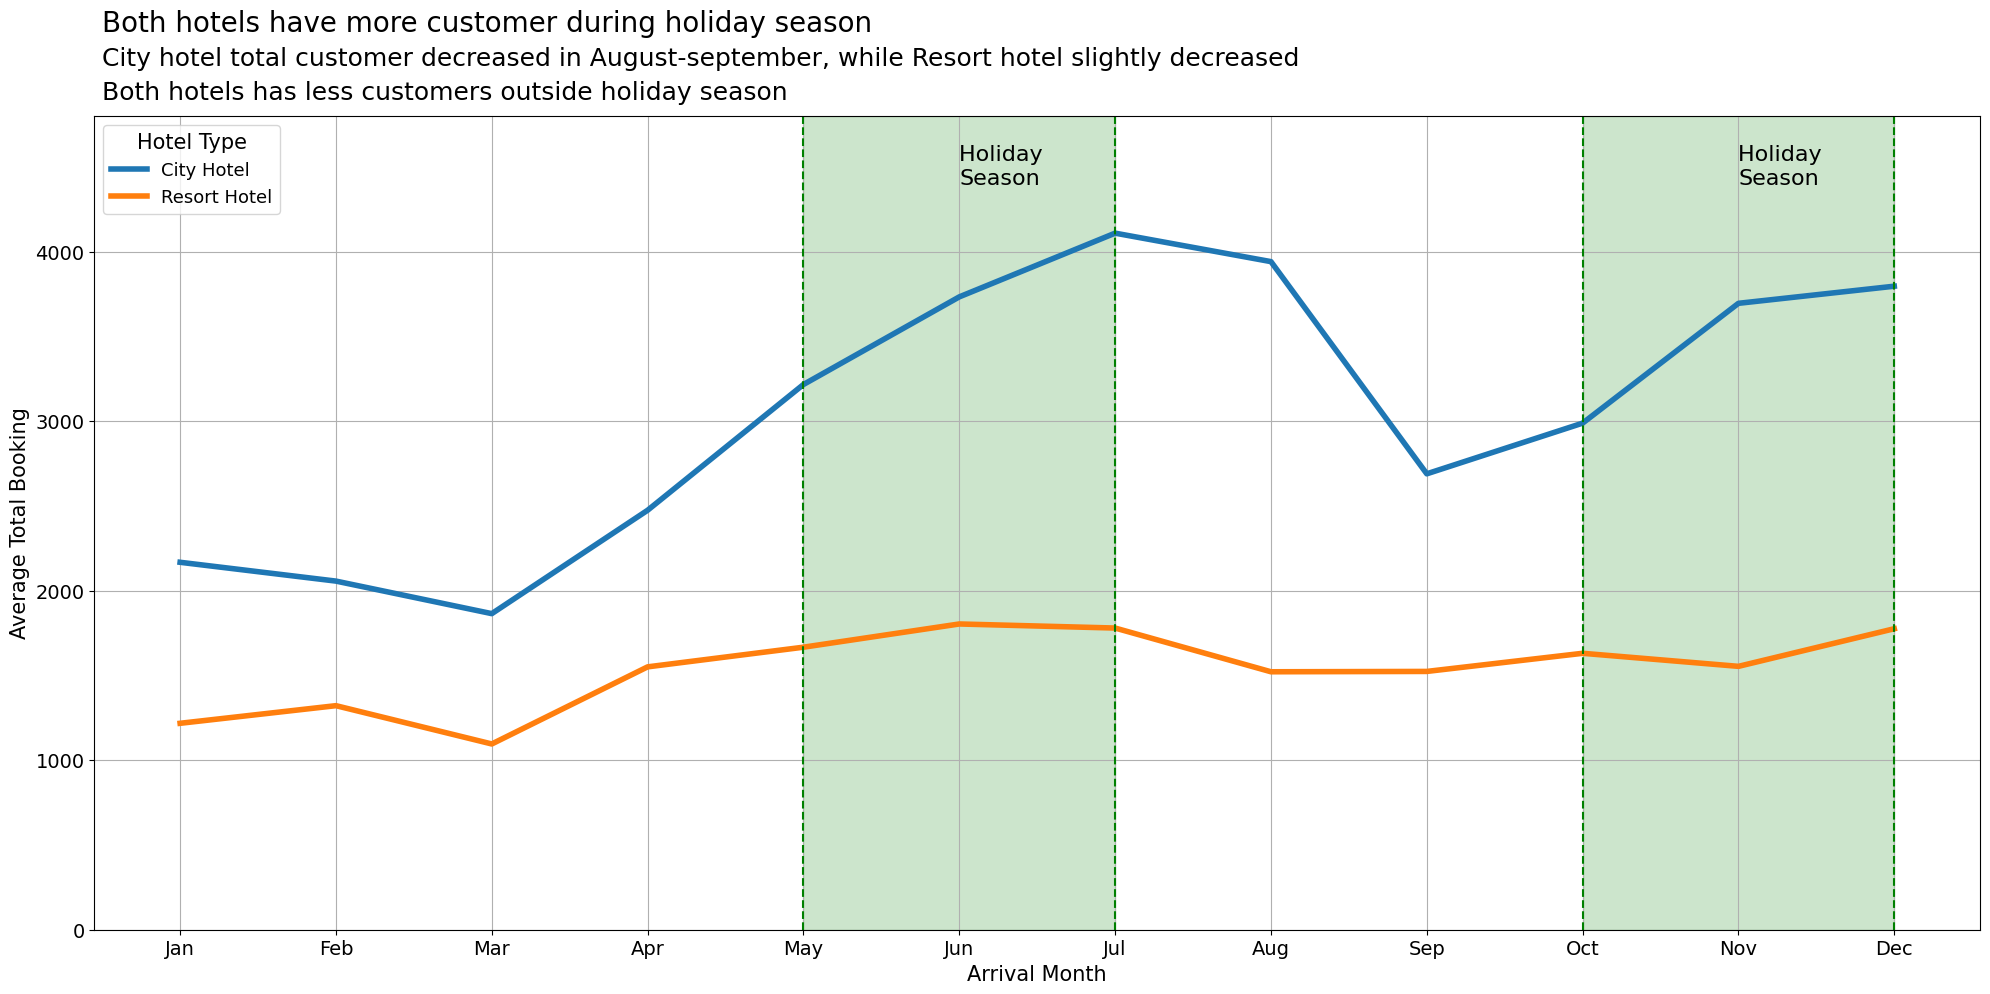

In [24]:
#membuat line plot
plt.figure(figsize = (20,10))
sns.lineplot(x = 'month', y = 'avg_total_booking', hue = 'hotel',
             size = 'hotel', sizes=(4,4), data = df2a)

#memberi judul dan mengatur font size
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.grid()
plt.legend(title = 'Hotel Type', title_fontsize = 15, prop={'size' : 13})

plt.xlabel('Arrival Month', fontsize = 15)
plt.ylabel('Average Total Booking', fontsize = 15)
plt.ylim(0,4800)

#memberikan highlight pada insight data
plt.axvline(4, ls = '--', color = 'Green')
plt.axvline(6, ls = '--', color = 'Green')
plt.text(x=5, y=4400, s='Holiday \nSeason', fontsize = 16, color= 'Black')
plt.stackplot(np.arange(4,7,1),[[4800]], color = 'Green', alpha = 0.2)

plt.axvline(9, ls = '--', color = 'Green')
plt.axvline(11, ls = '--', color = 'Green')
plt.text(x=10, y=4400, s='Holiday \nSeason', fontsize = 16, color= 'Black')
plt.stackplot(np.arange(9,12,1),[[4800]], color = 'Green', alpha = 0.2)

plt.text(x = -0.5, y = 5300, s='Both hotels have more customer during holiday season', fontsize = 20)
plt.text(x = -0.5, y = 5100, s = 'City hotel total customer decreased in August-september, while Resort hotel slightly decreased', fontsize = 18)
plt.text(x = -0.5, y = 4900, s = 'Both hotels has less customers outside holiday season', fontsize = 18)

plt.tight_layout()
plt.savefig('monthly_hotel_booking_analysis.png', dpi = 200)

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates


<Axes: xlabel='nights_stayed', ylabel='Count'>

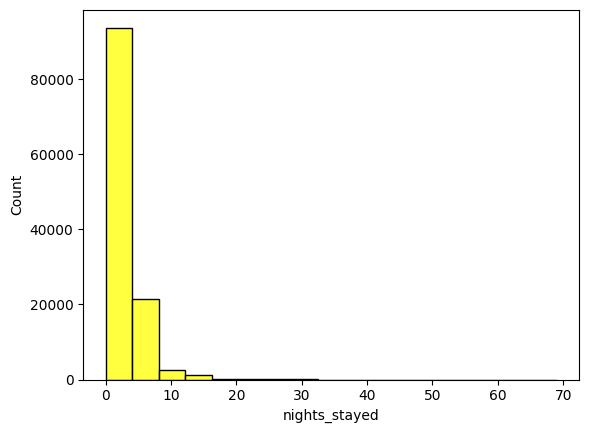

In [25]:
#membuat copy data hasil pre processing
df3 = df_preprocessing.copy()

#agregasi total durasi menginap untuk tiap hotel
df3['nights_stayed'] = df3['stays_in_weekend_nights'] + df3['stays_in_weekdays_nights']

sns.histplot(data = df3, x = 'nights_stayed', binwidth = 4, color = 'Yellow')

The data is right-skewed, while a good analysis ideally uses data that is normally distributed. Therefore, grouping was applied to make the distribution more balanced. The grouping was done for the total number of nights reaching up to three weeks, which are grouped from nights 15 to 21, and all values above 21 are placed in a separate category.

In [26]:
# pengelompokan data
df3['nights_stayed_group'] = np.where(df3['nights_stayed'] > 21,21,
                                      np.where(df3['nights_stayed'] >14, 15, df3['nights_stayed']))

#membuat tabel baru
df3a = df3.groupby(['hotel', 'is_canceled', 'nights_stayed_group'])['arrival_date_month'].count().reset_index(name = 'number_bookings')
df3_pivot = df3a.pivot_table(index = ['hotel', 'nights_stayed_group'], columns = 'is_canceled', values = 'number_bookings').reset_index()
df3_pivot['pct_canceled'] = round(df3_pivot[1] * 100 / (df3_pivot[0] + df3_pivot[1]),2)

df3_pivot.head()
plt.savefig('monthly_hotel_booking_analysis.png', dpi = 200)

<Figure size 640x480 with 0 Axes>

Next, to compare the two hotel types based on the length of stay, a bar chart will be used. This plot will also show how the duration of stay relates to the hotel cancellation rate.


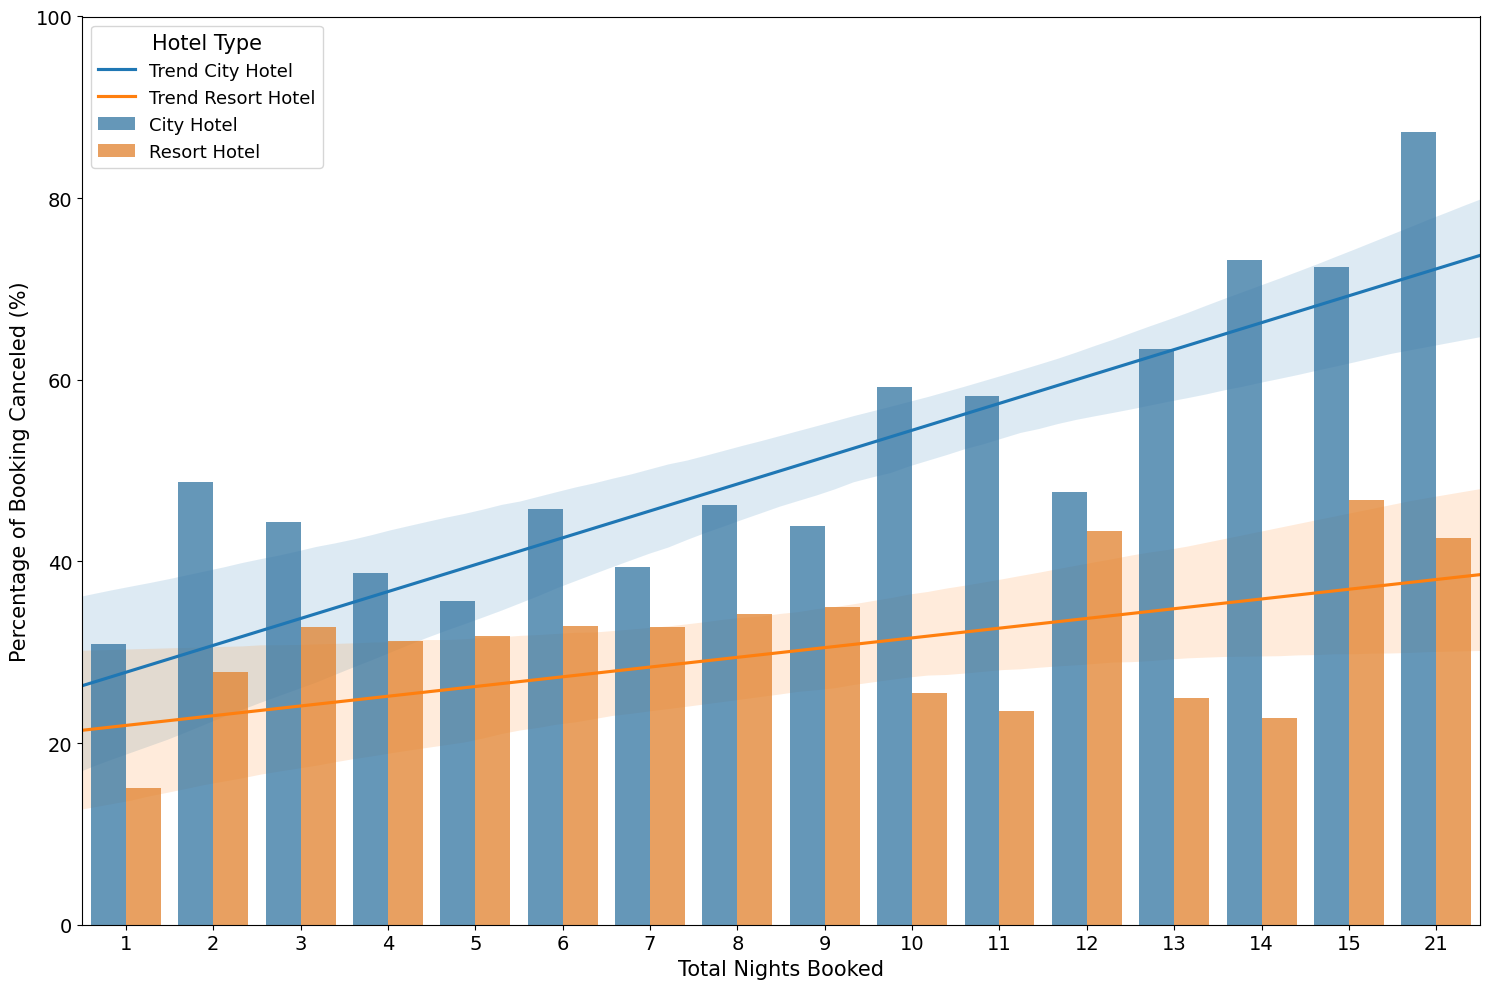

In [27]:
plt.figure (figsize = (15,10))
sns.regplot(x = 'nights_stayed_group', y = 'pct_canceled', data = df3_pivot[df3_pivot['hotel']== 'City Hotel'], scatter = False, label = 'Trend City Hotel' )
sns.regplot(x = 'nights_stayed_group', y = 'pct_canceled', data = df3_pivot[df3_pivot['hotel']== 'Resort Hotel'], scatter = False, label = 'Trend Resort Hotel' )
sns.barplot(x = 'nights_stayed_group', y = 'pct_canceled', hue = 'hotel', data = df3_pivot, alpha = 0.75)

plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(title = 'Hotel Type', title_fontsize = 15, prop={'size' : 13})

plt.xlabel('Total Nights Booked', fontsize = 15)
plt.ylabel('Percentage of Booking Canceled (%)', fontsize = 15)
plt.ylim(0,100)
plt.xlim(0.5, 16.5)

plt.tight_layout()
plt.savefig('Stay Duration on Hotel Bookings Cancellation Rates.png', dpi = 200)

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

melakukan analisis pengaruh jarak waktu pemesanan terhadap tingkat pembatalan pemesanan hotel

<Axes: xlabel='lead_time', ylabel='Count'>

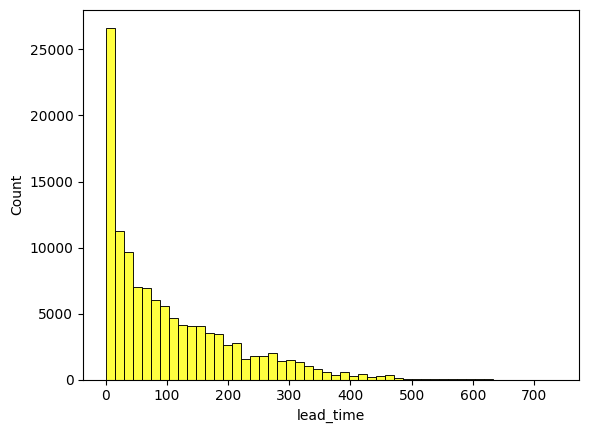

In [28]:
# #membuat copy data hasil pre processing
df4 = df_preprocessing.copy()

sns.histplot(data = df3, x='lead_time', bins=50, color='yellow')

Based on the histogram above, the data distribution is right-skewed. Therefore, grouping was applied to make the distribution more even. The lead time was also converted into monthly units, or every 30 days.


In [29]:
#kategorisasi kolom lead_time agar lebih sederhana
df4['lead_times'] = np.where(df4['lead_time'] > 400, 401, df4['lead_time'])
bins = list(np.arange(0, max(df4['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df4['lead_time_group'] = pd.cut(df4['lead_times'], bins = bins, include_lowest = True, labels = labels)

In [30]:
#agregasi untuk menghitung jum;ah pemesanan berdasarkan grup lead_time yang sudah dibuat dan berdasarkan tipe hotel
df4_book = df4.groupby(['hotel','lead_time_group', 'is_canceled'])['hotel'].count().reset_index(name='num_bookings')
df4_pivot = df4_book.pivot_table(index=['hotel','lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
df4_pivot.columns = ['hotel_type','lead_time_group', 'not_canceled', 'canceled']
df4_pivot['all_bookings'] = df4_pivot['not_canceled']+df4_pivot['canceled']
df4_pivot['pct_canceled'] = df4_pivot['canceled']*100.0/(df4_pivot['all_bookings'])

df4_pivot.head()

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings,pct_canceled
0,City Hotel,0-30,18060.0,5184.0,23244.0,22.302530
1,City Hotel,30-60,7266.0,4608.0,11874.0,38.807479
2,City Hotel,60-90,5210.0,3692.0,8902.0,41.473826
3,City Hotel,90-120,3956.0,3486.0,7442.0,46.842247
4,City Hotel,120-150,3064.0,2542.0,5606.0,45.344274


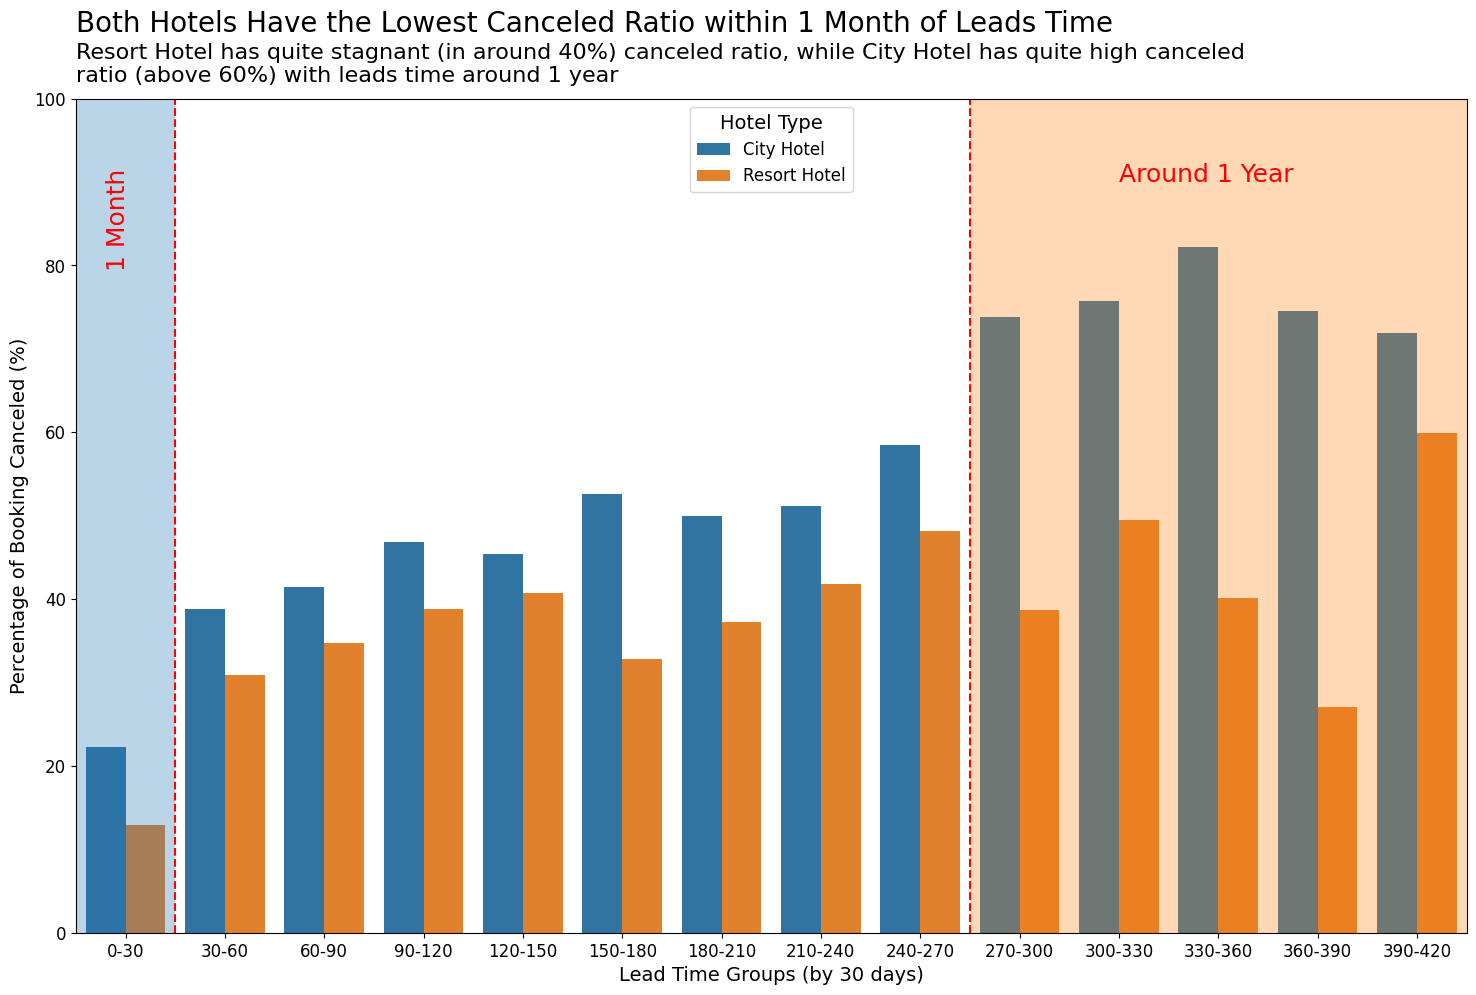

In [31]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'lead_time_group', y = 'pct_canceled', hue = 'hotel_type', data = df4_pivot)

plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.legend(title = 'Hotel Type', title_fontsize = 14, prop = {'size' : 12}, loc=9)

plt.xlabel('Lead Time Groups (by 30 days)', fontsize = 14)
plt.ylabel('Percentage of Booking Canceled (%)', fontsize = 14)
plt.ylim(0, 100)
plt.xlim(-0.5, 13.5)

plt.axvline(0.5, ls = '--', color = 'red')
plt.text(x=-0.2, y=80, s='1 Month', fontsize = 18, color='red', rotation = 90)
plt.stackplot(np.arange(-0.5, 1.5, 1), [[100]], alpha = 0.3)

plt.axvline(8.5, ls = '--', color = 'red')
plt.text(x=10, y=90, s='Around 1 Year', fontsize = 18, color='red')
plt.stackplot(np.arange(8.5, 14.5, 1), [[100]],  alpha = 0.3)

plt.text(x=-0.5, y=108, s="Both Hotels Have the Lowest Canceled Ratio within 1 Month of Leads Time",
         fontsize=20) # memberikan judul yang informatif
plt.text(x=-0.5, y=102, s="Resort Hotel has quite stagnant (in around 40%) canceled ratio, while City Hotel has quite high canceled \nratio (above 60%) with leads time around 1 year",
         fontsize=16) # memberikan keterangan tambahan atas judul

plt.tight_layout()
plt.savefig('Analisis pengaruh jarak.png', dpi = 200)